<a href="https://colab.research.google.com/github/Athulkrishna-S/L-and-T/blob/main/ImageDimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install scikit-learn

In [5]:
from sklearn.datasets import fetch_openml

In [6]:

mnist = fetch_openml('mnist_784', version=1,as_frame=False) #import as numpy array

In [7]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [8]:
print(type(mnist.data))
print(type(mnist.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [9]:
mnist.data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
mnist.data.shape

(70000, 784)

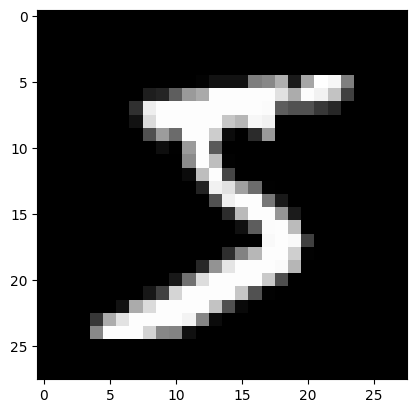

In [11]:
import matplotlib.pyplot as plt

first_image=mnist.data[0]
plt.imshow(first_image.reshape(28, 28), cmap="gray")
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np

In [13]:
x,y=mnist.data,mnist.target

In [14]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [15]:
x_subset, _, y_subset, _ = train_test_split(x_scaled, y, test_size=0.95, stratify=y, random_state=42) #only 5% of dataset is used here

In [16]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(x_subset)

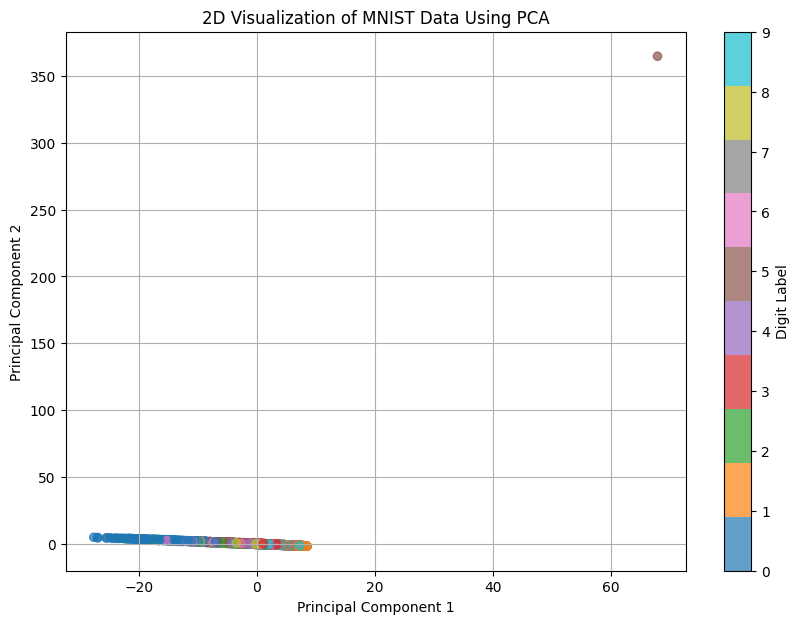

In [17]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_subset.astype(int), cmap="tab10", alpha=0.7)
plt.colorbar(scatter, label="Digit Label")
plt.title("2D Visualization of MNIST Data Using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

In [18]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: PC1 = {explained_variance[0]:.2f}, PC2 = {explained_variance[1]:.2f}")

Explained Variance Ratio: PC1 = 0.06, PC2 = 0.06


In [19]:
n_components = 50  # Use 50 components instead of 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(x_subset)

In [20]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

In [21]:
print("Explained Variance Ratio (for each principal component):")
print(explained_variance)

print("\nCumulative Explained Variance (cumsum):")
print(cumulative_variance)

Explained Variance Ratio (for each principal component):
[0.06101065 0.05898055 0.04293945 0.04124033 0.03158817 0.02707469
 0.02411442 0.02068205 0.01956366 0.01624276 0.01505751 0.01485582
 0.01396927 0.01369196 0.01271134 0.01224871 0.01145497 0.01114964
 0.01063363 0.01018431 0.00985705 0.00961227 0.0090221  0.00880919
 0.00836572 0.0082728  0.00796244 0.00788093 0.00764722 0.00741754
 0.00720312 0.00689382 0.0068439  0.00646271 0.00635734 0.00630251
 0.00618157 0.00604643 0.00587117 0.00571612 0.00562169 0.00554722
 0.00540076 0.00536907 0.00520459 0.00501123 0.00493729 0.004874
 0.00477373 0.00461387]

Cumulative Explained Variance (cumsum):
[0.06101065 0.1199912  0.16293065 0.20417098 0.23575915 0.26283384
 0.28694826 0.30763031 0.32719397 0.34343674 0.35849425 0.37335007
 0.38731934 0.40101129 0.41372263 0.42597133 0.4374263  0.44857594
 0.45920957 0.46939388 0.47925093 0.4888632  0.4978853  0.50669449
 0.51506021 0.52333301 0.53129546 0.53917639 0.54682361 0.55424115
 0.561444

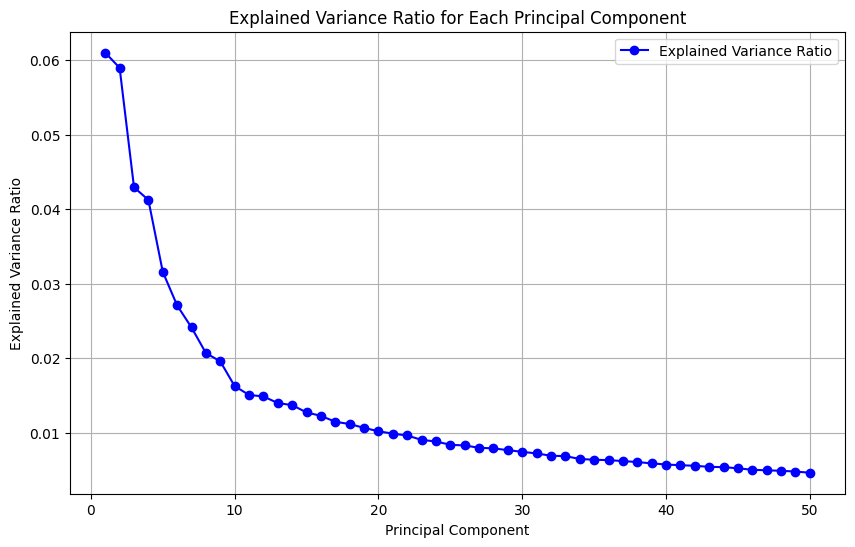

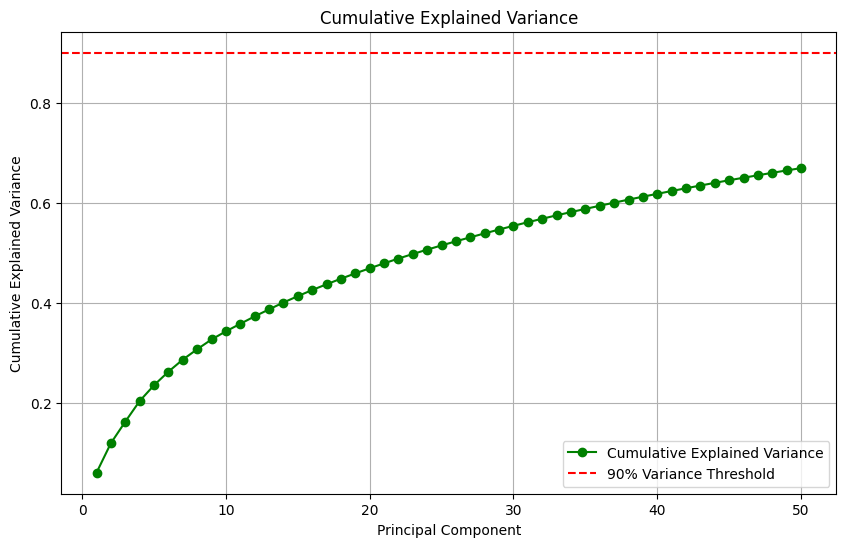

In [22]:

# Plot Explained Variance Ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='b', label='Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.legend()
plt.show()

# Plot Cumulative Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='g', label='Cumulative Explained Variance')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance Threshold')  # Marking the 90% variance threshold
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


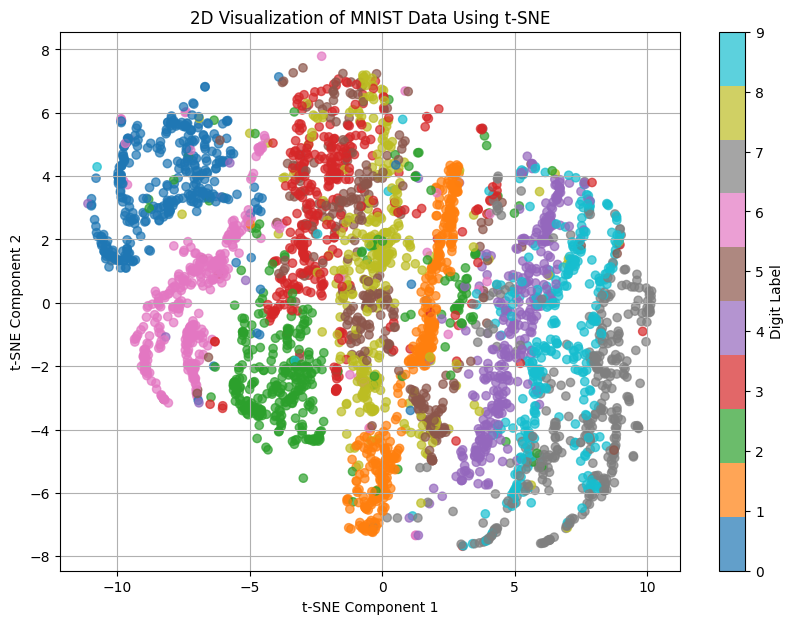

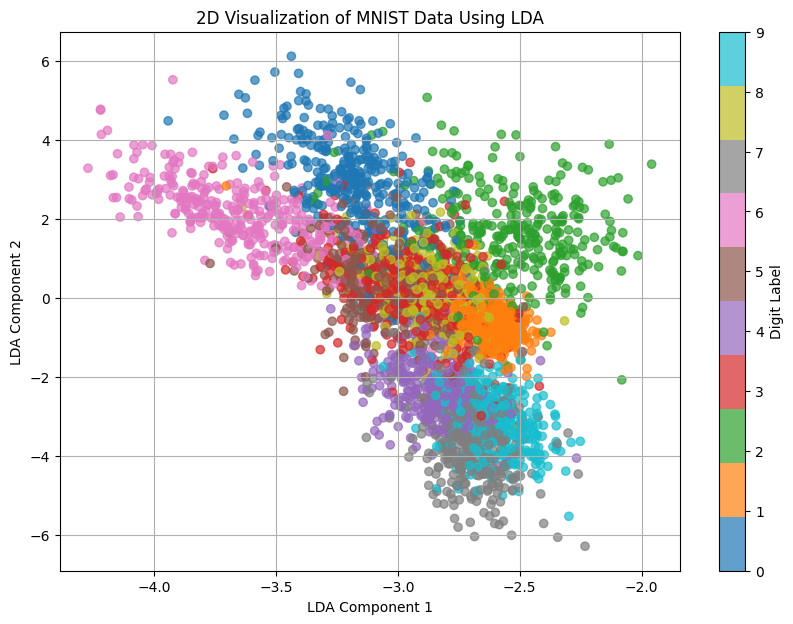

PCA Execution Time: 0.7772 seconds
t-SNE Execution Time: 0.0001 seconds
LDA Execution Time: 1.1205 seconds


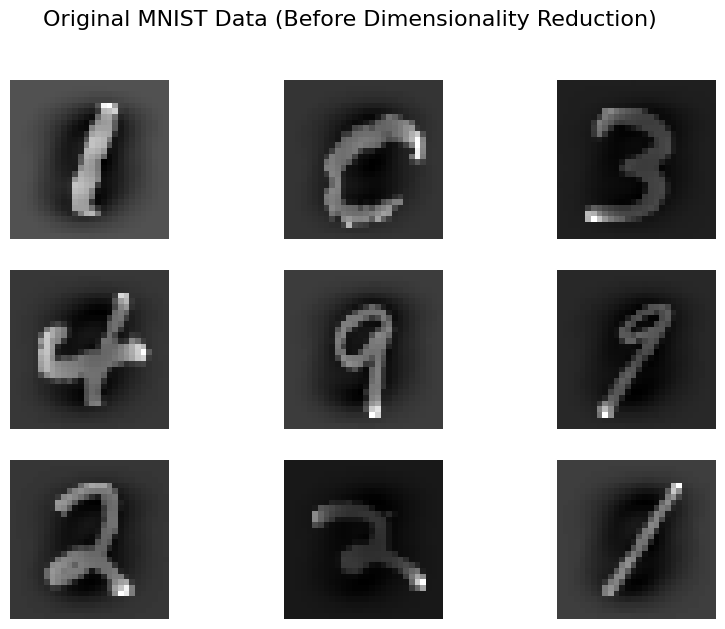

In [23]:
# Import t-SNE and LDA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# --- 1. t-SNE for Dimensionality Reduction ---
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(x_subset)

# Visualize t-SNE Results
plt.figure(figsize=(10, 7))
scatter_tsne = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset.astype(int), cmap="tab10", alpha=0.7)
plt.colorbar(scatter_tsne, label="Digit Label")
plt.title("2D Visualization of MNIST Data Using t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()

# --- 2. LDA for Dimensionality Reduction ---
lda = LDA(n_components=2)
X_lda = lda.fit_transform(x_subset, y_subset)

# Visualize LDA Results
plt.figure(figsize=(10, 7))
scatter_lda = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_subset.astype(int), cmap="tab10", alpha=0.7)
plt.colorbar(scatter_lda, label="Digit Label")
plt.title("2D Visualization of MNIST Data Using LDA")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.grid(True)
plt.show()

# --- 3. Comparison of Explained Variance for PCA, t-SNE, and LDA ---

# For PCA
pca = PCA(n_components=50)
X_pca = pca.fit_transform(x_subset)
explained_variance_pca = pca.explained_variance_ratio_

# Note: t-SNE and LDA do not have "explained variance" like PCA, but we can compare their runtime.
import time

# Measure execution time of PCA, t-SNE, and LDA
start_time = time.time()
pca = PCA(n_components=50)
pca.fit_transform(x_subset)
pca_time = time.time() - start_time

start_time = time.time()
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
tsne_time = time.time() - start_time

start_time = time.time()
lda = LDA(n_components=2)
lda.fit_transform(x_subset, y_subset)
lda_time = time.time() - start_time

# Print execution times
print(f"PCA Execution Time: {pca_time:.4f} seconds")
print(f"t-SNE Execution Time: {tsne_time:.4f} seconds")
print(f"LDA Execution Time: {lda_time:.4f} seconds")

# --- Discussion of Trade-Offs ---
# PCA: Computationally efficient with clear explained variance, especially for feature extraction.
# It is effective for retaining most of the variance in the data but can lose some local structures.
# t-SNE: Great for visualizing high-dimensional data in 2D or 3D but computationally expensive.
# It emphasizes local structure but may distort global relationships.
# LDA: Works well when the data has class labels, as it tries to maximize class separability.
# It is computationally efficient but may not capture complex nonlinearities.

# --- 4. Visualizing Original Data (Before Dimensionality Reduction) ---
# Visualize the first few samples of the original data (before PCA, t-SNE, or LDA)
plt.figure(figsize=(10, 7))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_subset[i].reshape(28, 28), cmap="gray")
    plt.axis('off')
plt.suptitle("Original MNIST Data (Before Dimensionality Reduction)", fontsize=16)
plt.show()
